# Capstone Project

### Objective
Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

k-Nearest Neighbour
Decision Tree
Support Vector Machine
Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
Jaccard index
F1-score
LogLoss


### Data pre-processing

In [2]:
#Importing all necessary packages

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#Install Seaborn for data visualization
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: done

# All requested packages already installed.



In [3]:
#Getting the dataset
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-08-12 15:25:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-08-12 15:25:48 (167 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
#Put the dataset into a nice Panda frame
df = pd.read_csv('loan_train.csv')
df.head()
df.shape

(346, 10)

In [5]:
#Convert any dates into proper dates
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
#Understand the counts of the loan statuses
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

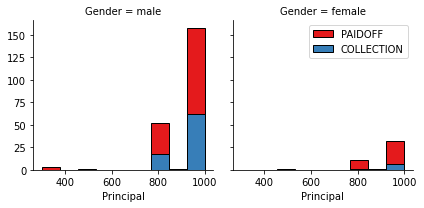

In [7]:
#Visualize dataset with Seaborn (gender, principal, loan status)
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

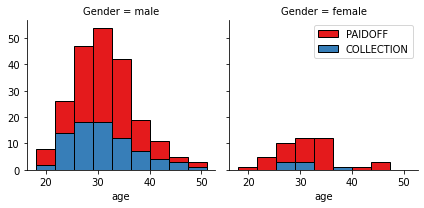

In [8]:
#Visualize dataset with Seaborn (gender, age, loan status)
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

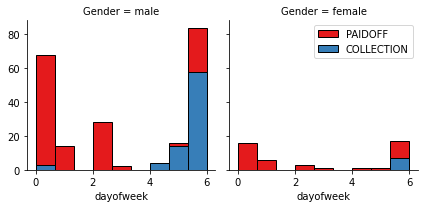

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,0


In [9]:
#create a day of the week
df['dayofweek'] = df['effective_date'].dt.dayofweek

#Visualize dataset with Seaborn (gender, day of week, loan status)
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#create a weekend binary variable if day of the week is > 4 (0- Mon, 1- Tues, 2- Wed, 3- Thu, 4-Fri, 5- Sat, 6-Sun)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
df.head()

### Converting categorical to binary variables 

In [10]:
#converting sex categorical variable into 0 for for male and 1 for female
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#converting the loan categorical variable into 0 for PAIDOFF and 1 for COLLECTION
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

#using inplace to ensure the dataframe is overwritten with this new binary classification
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,0
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,0


In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

In [12]:
#Assign all features we want to a new dataframe
Feature = df[['Principal','terms','age','Gender','weekend']]

#use one hot encoding technique to conver categorical varables to binary variables and append them to the feature dataframe
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.head()
Feature.shape

EducationDummies = pd.get_dummies(df[['education']])
EducationDummies.shape

Feature = pd.concat([Feature,EducationDummies], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,0,0,0,0,1
4,1000,30,29,0,0,0,0,0,1


### Converting the feature set into normalized values

In [13]:
#Putting everything in a new dataframe, because a lot of data manipulation will happen
X = Feature
y = df['loan_status'].values

#Ensuring they are still compatibly shaped
X.shape
y.shape

(346,)

In [14]:
#Normalizing the features using scikit-learn
X = preprocessing.StandardScaler().fit(X).transform(X)

# Classification

The actual classification algorithms start from here.

    K Nearest Neighbor(KNN)
    Decision Tree
    Support Vector Machine
    Logistic Regression


## K-Nearest Neighbour (KNN)

In [15]:
#import additional required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
#splitting my dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) #42 being the answer to life, the universe and everything
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


In [17]:
#model using KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7714285714285715


In [18]:
#find out how many neighbors is the best by running a loop
#important to prevent overfitting (neighbours too high) or underfitting (neighbours too low)
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # compute train and test set model accuracy
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)


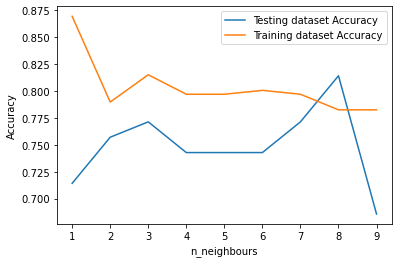

In [19]:
#Visualize neighbour count accuracies
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.show()

In [20]:
#Visually, I have shown that 8 neighbours is the best amount of neighbours for this dataset

#model using KNN
knn_final_model = KNeighborsClassifier(n_neighbors=8)
knn_final_model.fit(X_train,y_train)

# Calculate the accuracy of the model
print("The best model is 8 neighbours, resulting in an accuracy score of ", knn_final_model.score(X_test, y_test))

The best model is 8 neighbours, resulting in an accuracy score of  0.8142857142857143


## Decision Tree

In [21]:
#important any additional required packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [22]:
#sklearn's decision tree cannot work with categorical data, however I have already transformed everything into numerical or binary
#splitting everything into training or testing (could be skipped, because I have done it before)

#I am switching y back into categorical, in order to understand the output better


X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_trainset is", X_trainset.shape, "and y_trainset is", y_trainset.shape )
print("X_testset is", X_testset.shape, "and y_testset is", y_testset.shape)

X_trainset is (276, 9) and y_trainset is (276,)
X_testset is (70, 9) and y_testset is (70,)


In [23]:
#model using DecisionTree
paymentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
paymentTree # it shows the default parameters
paymentTree.fit(X_trainset,y_trainset)

#Calculate the accuracy of my tree
print(paymentTree.score(X_testset, y_testset))

0.8


In [24]:
#find out how many nodes is the best by running a loop
#important to prevent overfitting (nodes too high) or underfitting (nodes too low)

nodes = np.arange(1, 10)
train_accuracy = np.empty(len(nodes))
test_accuracy = np.empty(len(nodes))

for i, k in enumerate(nodes):
    paymentTree = DecisionTreeClassifier(criterion="entropy", max_depth = k)
    paymentTree.fit(X_train,y_train)
    
    # compute train and test set model accuracy
    train_accuracy[i] = paymentTree.score(X_train,y_train)
    test_accuracy[i] = paymentTree.score(X_test,y_test)

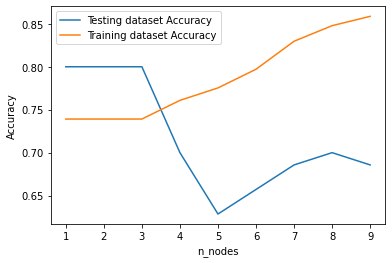

In [25]:
#Visualize the accuracy levels of different node counts

plt.plot(nodes, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(nodes, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_nodes')
plt.ylabel('Accuracy')
plt.show()

In [28]:
#Visually, I have shown that 2 or 3 nodes is the best amount of nodes for this dataset

#model using Decision Tree
paymentTree_final_model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
paymentTree_final_model # it shows the default parameters
paymentTree_final_model.fit(X_trainset,y_trainset)

# Calculate the accuracy of the model
print("The best model has 3 nodes, resulting in an accuracy score of ", paymentTree_final_model.score(X_test, y_test))
str(np.unique(y_trainset))

The best model has 3 nodes, resulting in an accuracy score of  0.8


'[0 1]'

In [31]:
#Visualize the best model with 3 nodes
#!conda install -c conda-forge pydotplus -y #can be commented out if already installed
#!conda install -c conda-forge python-graphviz -y #can be commented out if already installed

from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "paymentTree_final_model.png"
featureNames = Feature.columns[0:9]
out=tree.export_graphviz(paymentTree_final_model,feature_names=featureNames, out_file=dot_data, class_names= [0,1], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "int") to str

--2021-08-12 15:22:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2021-08-12 15:22:41 (68.6 MB/s) - ‘drug200.csv’ saved [5827/5827]

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object
DecisionTrees's Accuracy:  0.9833333333333333


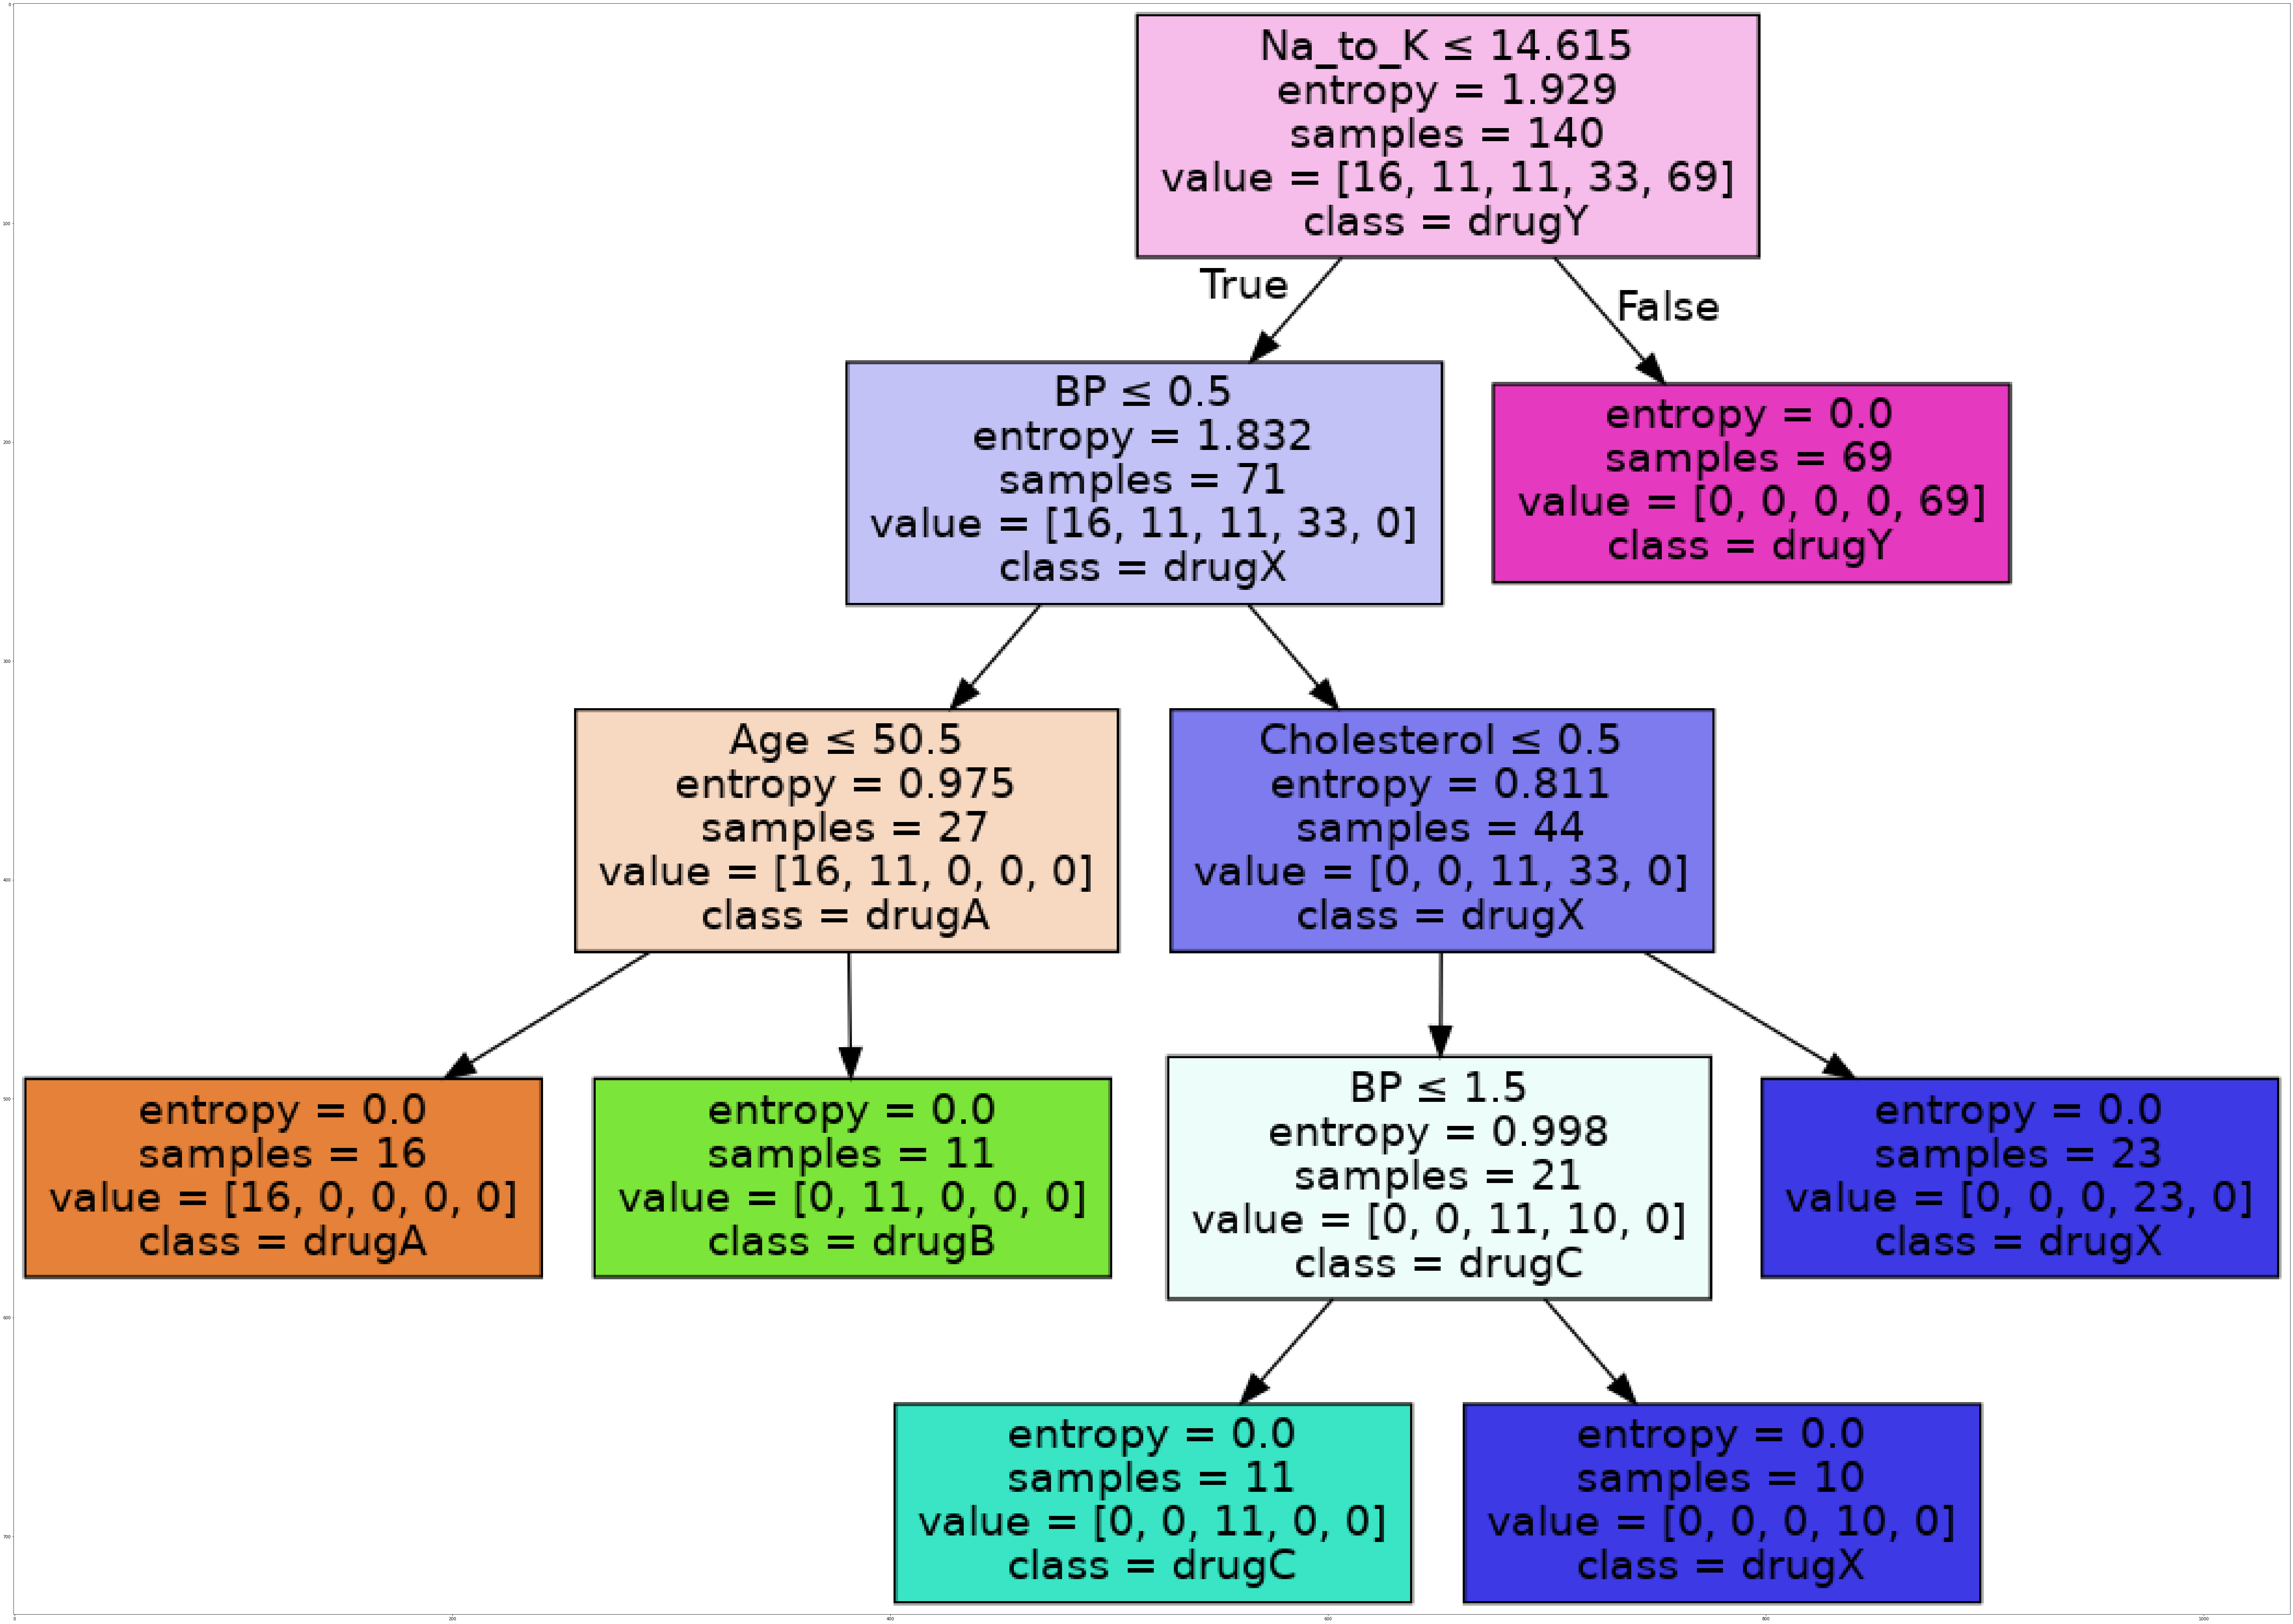